# sprint 機械学習スクラッチ 決定木

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import collections

In [2]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        # 各ノードのインスタンス
        self.y_left = 0
        self.y_right = 0
        # 最適なXの分割ポイント
        self.best_X_set = 0
        self.best_col = 0
        self.best_class_left = 0
        self.best_class_right = 0
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        #rootの不純度の計算
        root_gini = gain_gini(y)
        
        # 最大利得の初期化
        ig_max = 0
        
        # 最も不純度が低下する組み合わせを網羅的に探索
        # 特徴量毎に繰り返す
        for j in range(X.shape[1]): 
            # Xの固有値リストを取得（setでソート済み）
            X_set = list(set(X[:, j]))
            
            # 「Xの固有値の数−１」for
            for i in range(len(X_set)-1):
                # Xの固有値を元に分割
                # 各node保持
                self.y_left = y[np.where(X[:, j]<=X_set[i])]
                self.y_right = y[np.where(X[:, j]>X_set[i])]
                
                # 不純度の計算
                left_gini = gain_gini(self.y_left)
                right_gini = gain_gini(self.y_right)
                
                # 利得の計算
                root_len = len(y)
                ig = gain_ig(self, root_gini, left_gini, right_gini, root_len)
                
                # 利得が最大となる組み合わせの保持
                if ig > ig_max:
                    ig_max = ig
                    self.best_class_left = np.unique(self.y_left,
                                                     return_counts=True)[1].argmax()
                    self.best_class_right = np.unique(self.y_right,
                                                      return_counts=True)[1].argmax()
                    self.best_X_set = X_set[i]
                    self.best_col = j
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        y_pred = np.zeros(X.shape[0])
        y_pred[np.where(X[:, self.best_col]<=self.best_X_set)] = self.best_class_left
        y_pred[np.where(X[:, self.best_col]>self.best_X_set)] = self.best_class_right
        
        return y_pred

# 【問題1】不純度を求める関数
ノード の ジニ不純度 を計算する関数を作成してください。ノード t に対するジニ不純度 I(t) は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。

In [3]:
def gain_gini(y):
    
    # pureの初期化
    pure = 0
    # yの固有値リストの分だけpureを算出、合算
    for y_set in list(set(y)):
        pure += ((y==y_set).sum()/y.shape[0])**2
    gini = 1 - pure
    
    return gini

# 【問題2】情報利得を求める関数
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 I(t) を計算する関数を呼び出して使います。情報利得IGは以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。


ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。

In [4]:
def gain_ig(self, root_gini, left_gini, right_gini, root_len):
    
    #リーフノードの割合
    left_ratio = len(self.y_left)/root_len
    right_ratio = len(self.y_right)/root_len
    
    return root_gini - left_gini*left_ratio- right_gini*right_ratio

# 【問題3】学習
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。


訓練データに対して全ての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。


クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

# 【問題4】推定
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。


入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [5]:
# シンプルデータセット２
X2 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
# 学習、推定
sdt1 = ScratchDecesionTreeClassifierDepth1()
sdt1.fit(X2, y2)
y_pred2 =sdt1.predict(X2)
y_pred2

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1.])

In [7]:
# 正解率
print("正解率：", accuracy_score(y2, y_pred2))
# 適合率
print("適合率：", precision_score(y2, y_pred2))
# Recall（再現率）
print("再現率：", recall_score(y2, y_pred2))
# F値
print("F値：", f1_score(y2, y_pred2))
# 混同行列
print("混同行列\n", confusion_matrix(y2, y_pred2))

正解率： 0.675
適合率： 0.8181818181818182
再現率： 0.45
F値： 0.5806451612903226
混同行列
 [[18  2]
 [11  9]]


# 【問題6】決定領域の可視化
決定領域を可視化してください。

In [8]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='x1',
                    ylabel='x2', target_names=['setosa', 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green', 'red', 'blue']
    contourf_color = ['white', 'pink', 'skyblue']
    # クラスの長さをクラス数
    n_class = len(set(y))

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    
    # contourf_color、scatter_color、target_namesをクラス数に応じて変化
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap([contourf_color[n] for n in set(y)]))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80,
                    color=scatter_color[target],label=target_names[target], marker='o')
    
    patches = [mpatches.Patch(color=scatter_color[n], label=target_names[n]) for n in set(y)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

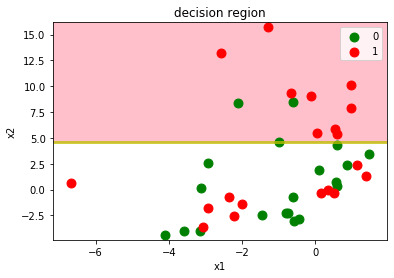

In [9]:
# グラフ化
decision_region(X2, y2, sdt1, target_names=["0", "1", "2"])

# 【問題7】（アドバンス課題）深さ2の決定木分類器クラスの作成
深さが2の決定木分類器のクラスScratchDecesionTreeClassifierDepth2を作成してください。


深さ2とは空間の分割を2回行うことを指します。


《ヒント》


各ノードをインスタンスとして扱うと、任意の深さへの拡張が行いやすくなります。

# 【問題8】（アドバンス課題）深さに制限のない決定木分類器クラスの作成
深さに制限のない決定木分類器のクラスScratchDecesionTreeClassifierDepthInfを作成してください。


任意の深さを指定できるようにするとともに、指定しない場合は全ての葉ノードがジニ不純度0となるまで続けられるようにもしてください。

In [27]:
class ScratchDecesionTreeClassifierDepthf():
    """
    深さ2の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, depth=None, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        # 各ノードのインスタンス
        self.y_left = 0
        self.y_right = 0
        
        # [深さ毎[ノード毎]]の入れ子構造を記録するための各リスト
        # →これを利用し「繰り返し処理」、「predict」を動かす
        # ノードのy
        self.y = []
        # 分割時のX条件（閾値）
        self.best_X_set = []
        # 分割時のX列番号
        self.best_col = []
        # 分割後のleft, rightのクラス
        self.best_class = []
        # ノードのX
        self.depth_node_list = []
        
        # 深さ
        self.depth = depth
        
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        # 最も不純度が低下する組み合わせを網羅的に探索
        
        # 分岐に使用するX初期値をリストとして追加（深さ、ノードの入れ子構造）
        self.depth_node_list.append(X)
        #Xと同様にy初期値もリスト追加
        self.y.append(y)
        
        # 深さの指定がない場合
        if not self.depth:
            # 仮の深さを設定（とりあえず1000000回を最大）
            self.depth = 1000000
        # 深さの記録
        depth_log = 0
        
        # 深さの数だけ繰り返す、深さ指定なしの場合は純度マックスまで
        for depth in range(self.depth): 
            # 深さの記録（深さの指定有無に関わらず記録することで、これをpredictに使用する）
            depth_log +=1
            # ノード毎の次ノードの記録リストを初期化
            next_node_list = []
            next_class_list = []
            next_X_set_list = []
            next_col_list = []
            next_y_list = []
            
            # 次の繰り返しのためにノードの数を取得（depth０で分岐）
            if depth==0:
                node_len = len(self.depth_node_list)
            else:
                node_len = len(self.depth_node_list[depth])
                    
            # 各層のノードの数だけ繰り返し
            for node_num in range(node_len):
                # この時に注目するnodeのX、yを取得（depth０で分岐）
                if depth==0:
                    node_X = self.depth_node_list[depth]
                    node_y = self.y[depth]
                else:
                    node_X = self.depth_node_list[depth][node_num]
                    node_y = self.y[depth][node_num]
                
                # 最大利得の初期化
                ig_max = 0
                
#                 # 確認用　ジニ不純度のリスト初期化
#                 gain_list = []
                     
                # 純度がマックスでない場合    
                if len(set(node_y))>1 and node_y!="stop":
                    # 特徴量毎に繰り返す
                    for j in range(node_X.shape[1]): 
                        # Xの固有値リストを取得（setでソート済み）
                        X_set = list(sorted(set(node_X[:, j])))

                        # 「Xの固有値の数−１」で各分岐で不純度算出
                        for i in range(len(X_set)-1):
                            # 各node保持（利得計算gain_igで使用）
                            self.y_left = node_y[np.where(node_X[:, j]<=X_set[i])]
                            self.y_right = node_y[np.where(node_X[:, j]>X_set[i])]

                            # 不純度の計算
                            left_gini = gain_gini(self.y_left)
                            right_gini = gain_gini(self.y_right)
                            root_gini = gain_gini(node_y)

                            # node_yの要素数をここで取得（利得計算gain_igで使用）
                            root_len = len(node_y)
                            
                            # 利得の計算
                            ig = gain_ig(self, root_gini, left_gini, right_gini, root_len)

#                             # 確認用　ジニ不純度の記録
#                             gain_list.append(ig)

                            # 利得が最大となる組み合わせの保持
                            if ig > ig_max:
                                ig_max = ig                                
                                best_X_set = X_set[i]
                                best_col = j

#                     # 確認用のprint                   
#                     print("depth", depth)
#                     print("node_num", node_num)
#                     print("node_X\n", node_X)
#                     print("node_y", node_y)
#                     print("best_col", best_col)
#                     print("best_X_set", best_X_set)
#                     print("node_X[:, best_col]", node_X[:, best_col])
#                     print("np.where(node_X[:, best_col]<=best_X_set)", np.where(node_X[:, best_col]<=best_X_set))
#                     print()
                    
                    # 次nodeのXを取得
                    best_X_left = node_X[np.where(node_X[:, best_col]<=best_X_set)]
                    best_X_right = node_X[np.where(node_X[:, best_col]>best_X_set)]

                    # 次nodeのyを取得
                    best_y_left = node_y[np.where(node_X[:, best_col]<=best_X_set)]
                    best_y_right = node_y[np.where(node_X[:, best_col]>best_X_set)]
                    
                    # 次nodeのクラス設定
                    best_class_left = collections.Counter(best_y_left).most_common(1)[0][0]
                    best_class_right = collections.Counter(best_y_right).most_common(1)[0][0]
                    
                
                # node_yの純度がマックスになった場合
                else:
                    # それぞれの記録を「"stop"」にする
                    best_X_left = "stop"
                    best_X_right = "stop"
                    best_class_left = "stop"
                    best_class_right = "stop"
                    best_X_set = "stop"
                    best_col = "stop"
                    best_y_left = "stop"
                    best_y_right = "stop"
                             
#                 # 確認用のprint
#                 print("depth", depth)
#                 print("node_num", node_num)
#                 print("node_X", node_X)
#                 print("node_y", node_y)
#                 print("best_col", best_col)
#                 if best_col == "stop":
#                     print("node_X[:, best_col]  best_col==stop")
#                 else:
#                     print("node_X[:, best_col]", node_X[:, best_col])
#                 print("best_X_set", best_X_set)
#                 print("best_X_left", best_X_left)
#                 print("best_X_right", best_X_right)
#                 print('best_y_left', best_y_left)
#                 print('best_y_right', best_y_right)
#                 print("best_class_left", best_class_left)
#                 print("best_class_right", best_class_right)
#                 print("np.unique(best_y_left, return_counts=True)", np.unique(best_y_left, return_counts=True))
#                 print("np.unique(best_y_right, return_counts=True)", np.unique(best_y_right, return_counts=True))
#                 print("gain_list", gain_list)
#                 print("ig_max", ig_max)
#                 print()
                
                # ノード毎の次ノードX, yの記録、保持
                next_node_list.append(best_X_left)
                next_node_list.append(best_X_right)
                next_y_list.append(best_y_left)
                next_y_list.append(best_y_right)               
                # best_class、best_colも同様に記録、保持
                next_class_list.append(best_class_left)
                next_class_list.append(best_class_right)
                next_X_set_list.append(best_X_set)
                next_col_list.append(best_col)            
                
            # 深さ毎のノードリストとして次ノードのX, y記録、保持
            self.depth_node_list.append(next_node_list)
            self.y.append(next_y_list)
            # best_class、best_colも同様に記録、保持
            self.best_class.append(next_class_list)
            self.best_X_set.append(next_X_set_list)
            self.best_col.append(next_col_list)            
        
            # 最終的な深さの保持（predictに使用できるように）
            self.depth = depth_log
            
            # 全てが純度マックスになったら終了
            if len(list(set(self.best_col[depth])))==1 and list(set(self.best_col[depth]))[0]=="stop":
                return
            
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
            
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        # y_predの初期化、pandasにすることでインデックス指定で値を変更できる
        blank = [0 for i in range(X.shape[0])]
        y_pred = pd.DataFrame(blank)
        
        # y_pred更新した後のインデックス用リスト（深さ毎に各ノードを記録）
        y_index_list = []
        y_index_list.append(y_pred.index.values)
              
        # 深さの数だけ繰り返す        
        for depth in range(self.depth):
            # 各層のノードの数だけ繰り返し
            if depth==0:
                    node_len = 1
            else:
                node_len = len(self.depth_node_list[depth])
            
            # y_pred更新した後のインデックスを深さ毎にリスト化
            y_index = []
            
            for node_num in range(node_len):
                # 分離対象のy_predのインデックス
                if depth==0:
                    y_index_target = y_index_list[0]
                else:
                    y_index_target = y_index_list[depth][node_num]
                
#                 # 確認用のprint
#                 print("depth", depth)
#                 print("node_num", node_num)
#                 print("処理前のy_pred", y_pred.values.ravel())
#                 print("y_indexのリスト", y_index_list)
#                 print("対象のy_index_target", y_index_target)
#                 if y_index_target=="stop":
#                     print("対象のy_predはstop")
#                 else:
#                     print("対象のy_pred", y_pred.iloc[y_index_target].values.ravel())
                
                # y_predの純度がマックスでない場合
                # かつ、fit時の純度がマックスでない場合
                if len(set(y_index_target))>1 and y_index_target!="stop" and self.best_col[depth][node_num]!="stop":
                    
                    # 閾値となるXの特徴量の列番号
                    col = self.best_col[depth][node_num]
                    # 閾値
                    best_X_set = self.best_X_set[depth][node_num]
                    
                     # 分離後のクラス
                    left_class = self.best_class[depth][2*node_num]
                    right_class = self.best_class[depth][2*node_num+1]
                    
                    # 分離条件で分けられたインデックス（出力は０スタート）
                    left_index_0start = np.where(X[y_index_target, col]<=best_X_set)
                    right_index_0start = np.where(X[y_index_target, col]>best_X_set)
                    # 分離条件で分けられたインデックス（０スタートをy_predインデックスに対応した値に変換）
                    left_index = y_pred.iloc[y_index_target].iloc[left_index_0start].index.values
                    right_index = y_pred.iloc[y_index_target].iloc[right_index_0start].index.values
                   
                    # 分離後のクラス指定
                    y_pred.iloc[left_index] = left_class
                    y_pred.iloc[right_index] = right_class

                    # 分離後の各ノードのインデックス取得
                    y_index.append(left_index)
                    y_index.append(right_index)
                      
#                     # 確認用のprint
#                     print("col", col)
#                     print("best_X_set", best_X_set)
#                     print("left_index", left_index)
#                     print("right_index", right_index)
#                     print("分離後leftのy_pred", y_pred.iloc[left_index].values.ravel())
#                     print("分離後rightのy_pred", y_pred.iloc[right_index].values.ravel())
#                     print("self.best_class", self.best_class)
#                     print("self.best_class[depth]", self.best_class[depth])
#                     print("left用 2*node_num", 2*node_num)
#                     print("right用 2*node_num+1", 2*node_num+1)
#                     print("left_class", left_class)
#                     print("right_class", right_class)
#                     print("処理後のy_pred", y_pred.values.ravel())
#                     print()
                    
                # y_predの純度がマックスの時
                # またはfit時の純度がマックスの場合(とりあえず「"stop"」を記録)
                else:
                    y_index.append("stop")
                    y_index.append("stop")
                    
#                     # 確認用のprint
#                     print("depth", depth)
#                     print("node_num", node_num)
#                     print("y_index", y_index)
#                     print()
                        
            # 分離後の深さ毎のインデックス記録、保持
            y_index_list.append(y_index)
        
        return y_pred.values.ravel()

## 深さ２

In [24]:
# 学習　深さ２
sdtf_2 = ScratchDecesionTreeClassifierDepthf(2)
sdtf_2.fit(X2, y2)
y_pred2_2 = sdtf_2.predict(X2)
y_pred2_2

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [25]:
# 正解率　深さ２
print("正解率：", accuracy_score(y2, y_pred2_2))
# 適合率
print("適合率：", precision_score(y2, y_pred2_2))
# Recall（再現率）
print("再現率：", recall_score(y2, y_pred2_2))
# F値
print("F値：", f1_score(y2, y_pred2_2))
# 混同行列
print("混同行列\n", confusion_matrix(y2, y_pred2_2))

正解率： 0.675
適合率： 0.8181818181818182
再現率： 0.45
F値： 0.5806451612903226
混同行列
 [[18  2]
 [11  9]]


/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


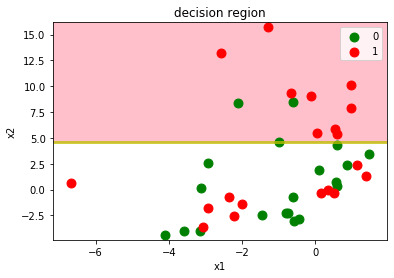

In [26]:
# グラフ化　深さ指定なし
decision_region(X2, y2, sdtf_2, target_names=["0", "1", "2"])

## 深さ指定なし

In [14]:
# 学習　深さ指定なし
sdtf_f = ScratchDecesionTreeClassifierDepthf()
sdtf_f.fit(X2, y2)
y_pred2_f = sdtf_f.predict(X2)
y_pred2_f

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:91: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
# 正解率　深さ指定なし
print("正解率：", accuracy_score(y2, y_pred2_f))
# 適合率
print("適合率：", precision_score(y2, y_pred2_f))
# Recall（再現率）
print("再現率：", recall_score(y2, y_pred2_f))
# F値
print("F値：", f1_score(y2, y_pred2_f))
# 混同行列
print("混同行列\n", confusion_matrix(y2, y_pred2_f))

正解率： 1.0
適合率： 1.0
再現率： 1.0
F値： 1.0
混同行列
 [[20  0]
 [ 0 20]]


/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:256: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


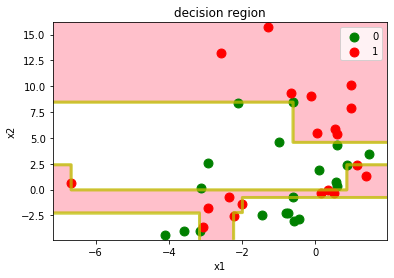

In [16]:
# グラフ化　深さ指定なし
decision_region(X2, y2, sdtf_f, target_names=["0", "1", "2"])

## ボツコード
* ２層目以降、内部ノードが全てルートノードになっている。（ジニ不純度計算、閾値による分離で狂う）
* 純度がマックスの際の処理
* predictでの処理する y のインデックス（numpyのままではインデックスで処理できない）

In [17]:
class ScratchDecesionTreeClassifierDepth2():
    """
    深さ2の決定木分類器のスクラッチ実装

    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        # 各ノードのインスタンス
        self.y_left = 0
        self.y_right = 0
        # 最適なXの分割ポイント
        self.best_X_set = []
        self.best_col = []
        self.best_class = []
        # 深さ分だけ繰り返すための途中ノード記録リスト
        self.depth_node_list = []
        # 深さ
        self.depth = 2
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        """
        #rootの不純度の計算
        root_gini = gain_gini(y)
        
        # 最大利得の初期化
        ig_max = 0
        
        # 最も不純度が低下する組み合わせを網羅的に探索
        # 分岐に使用するX初期値をリストとして追加（深さ、ノードの入れ子構造）
        self.depth_node_list.append(X)
        
        # 深さの数だけ繰り返す
        for depth in range(self.depth):
            # ノード毎の次ノードの記録リストを初期化
            next_node_list = []
            next_class_list = []
            next_X_set_list = []
            next_col_list = []
            
            # 次の繰り返しのためにノードの数を取得（depth０で分岐）
            if depth==0:
                node_len = len(self.depth_node_list)
            else:
                node_len = len(self.depth_node_list[depth])
                    
            # 各層のノードの数だけ繰り返し
            for node_num in range(node_len):
                # この時に注目するnode_Xを取得（depth０で分岐）
                if depth==0:
                    node_X = self.depth_node_list[depth]
                else:
                    node_X = self.depth_node_list[depth][node_num]
                     
                # 特徴量毎に繰り返す
                for j in range(node_X.shape[1]): 
                    # Xの固有値リストを取得（setでソート済み）
                    X_set = list(set(node_X[:, j]))

                    # 「Xの固有値の数−１」for
                    for i in range(len(X_set)-1):
                        # Xの固有値を元に分割
                        # 各node保持
                        self.y_left = y[np.where(node_X[:, j]<=X_set[i])]
                        self.y_right = y[np.where(node_X[:, j]>X_set[i])]

                        # 不純度の計算
                        left_gini = gain_gini(self.y_left)
                        right_gini = gain_gini(self.y_right)

                        # 利得の計算
                        root_len = len(y)
                        ig = gain_ig(self, root_gini, left_gini, right_gini, root_len)

                        # 利得が最大となる組み合わせの保持
                        if ig > ig_max:
                            ig_max = ig
                            best_class_left = np.unique(self.y_left,
                                                        return_counts=True)[1].argmax()
                            if best_class_left==0:
                                best_class_right = 1
                            else:
                                best_class_right = 0
                            best_X_set = X_set[i]
                            best_col = j

                            # 深さぶん繰り返すため次ノードを取得
                            best_X_left = node_X[np.where(node_X[:, j]<=X_set[i])]
                            best_X_right = node_X[np.where(node_X[:, j]>X_set[i])]
                
                # ノード毎の次ノードの記録、保持
                next_node_list.append(best_X_left)
                next_node_list.append(best_X_right)
                
                # best_class、best_colも同様に記録、保持
                next_class_list.append(best_class_left)
                next_class_list.append(best_class_right)
                next_X_set_list.append(best_X_set)
                next_col_list.append(best_col)
                
            # 深さ毎のノードリストとして次ノードを記録、保持
            self.depth_node_list.append(next_node_list)
            
            # best_class、best_colも同様に記録、保持
            self.best_class.append(next_class_list)
            self.best_X_set.append(next_X_set_list)
            self.best_col.append(next_col_list)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
            
        
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        """
        # y_predの初期化、pandas！！
        # y_pred = pd.DataFrame(X.shape[0])
        blank = [0 for i in range(X.shape[0])]
        y_pred = pd.DataFrame(blank)
        
        # y_pred更新した後のインデックス用リスト
        y_index_list = []
        y_index_list.append(y_pred.index.values)
              
        # 深さの数だけ繰り返す        
        for depth in range(self.depth):
            # 各層のノードの数だけ繰り返し
            if depth==0:
                    node_len = 1
            else:
                node_len = len(self.depth_node_list[depth])
            
            for node_num in range(node_len):
                # 閾値となるXの特徴量の列番号
                col = self.best_col[depth][node_num]
                # 閾値
                best_X_set = self.best_X_set[depth][node_num]
                # 分離対象のy_predのインデックス
                if depth==0:
                    y_index_target = y_index_list[0]
                else:
                    y_index_target = y_index_list[depth][node_num]
                
                # 分離条件で分けられたインデックス（行番号はy_predのインデックス）
                left_index = np.where(X[y_index_target, col]<=best_X_set)
                right_index = np.where(X[y_index_target, col]>best_X_set)
                # 分離後のクラス
                left_class = self.best_class[depth][2*node_num]
                right_class = self.best_class[depth][2*node_num+1]
                           
                # 分離
                y_pred.iloc[left_index] = left_class
                y_pred.iloc[right_index] = right_class
                
                # 分離後のインデックス取得
                y_index = []
                y_index.append(*left_index)
                y_index.append(*right_index)

            y_index_list.append(y_index)
                
        return y_pred.values.ravel()

In [18]:
# 学習
sdt2 = ScratchDecesionTreeClassifierDepth2()
sdt2.fit(X2, y2)
y_pred2_2 = sdt2.predict(X2)
y_pred2_2

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [19]:
# 正解率
print("正解率：", accuracy_score(y2, y_pred2_2))
# 適合率
print("適合率：", precision_score(y2, y_pred2_2))
# Recall（再現率）
print("再現率：", recall_score(y2, y_pred2_2))
# F値
print("F値：", f1_score(y2, y_pred2_2))
# 混同行列
print("混同行列\n", confusion_matrix(y2, y_pred2_2))

正解率： 0.45
適合率： 0.45454545454545453
再現率： 0.5
F値： 0.47619047619047616
混同行列
 [[ 8 12]
 [10 10]]


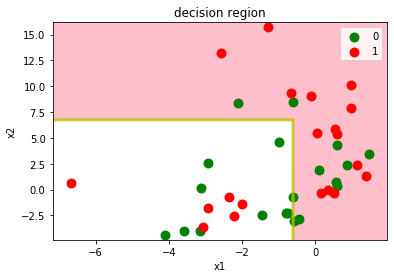

In [20]:
# グラフ化
decision_region(X2, y2, sdt2, target_names=["0", "1", "2"])